In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Conv2D

from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [5]:
test_image = image.load_img('static/upload/late_blight.jpg', target_size = (150, 150))

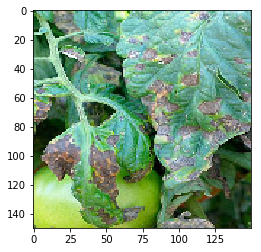

In [6]:
plt.imshow(test_image)
plt.show()

In [7]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

In [8]:
train_set = train_datagen.flow_from_directory(
            '/Users/fadlimuharram/Documents/cnn/tomat/segmentTambahan/training_set',
            target_size=(250, 250),
            batch_size=8,
            class_mode='categorical')
    

Found 5309 images belonging to 4 classes.


In [9]:
x,y = train_set.next()

[0. 1. 0. 0.]


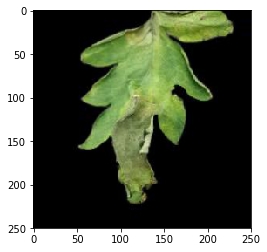

[0. 0. 0. 1.]


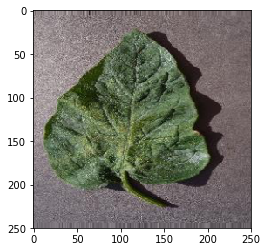

[1. 0. 0. 0.]


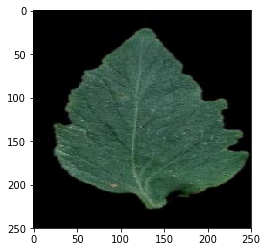

In [10]:
for i in range(0,3):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image)
    plt.show()

In [11]:
#test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [12]:
test_set = test_datagen.flow_from_directory(
            'static/',
            target_size=(64, 64),
            batch_size=8,
            class_mode='categorical')

Found 8 images belonging to 1 classes.


In [15]:
test_set.class_indices.items()

dict_items([('upload', 0)])

In [13]:
x,y = test_set.next()

[1.]


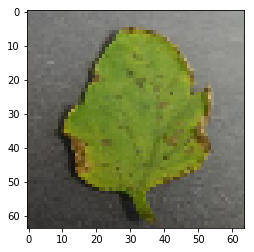

[1.]


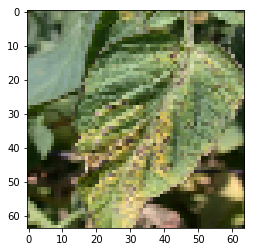

[1.]


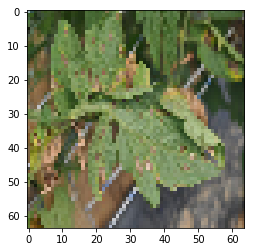

In [14]:
for i in range(0,3):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image)
    plt.show()

In [9]:
from time import time
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Conv2D

from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import flask
from flask import request, redirect, url_for
from werkzeug.utils import secure_filename
import os
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2

In [16]:
daun = image.load_img('static/upload/late_blight.jpg', target_size = (150, 150))

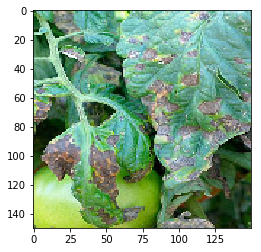

In [17]:
plt.imshow(daun)

In [66]:
klasifikasi = Sequential()
    
#Layer 1
#Conv Layer 1 
#conv => relu => pool
klasifikasi.add(Conv2D(filters = 3,
                 kernel_size = 3,
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (150, 150, 3)))
#Pooling layer 1
klasifikasi.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 2
#Conv Layer 2
#conv => relu => pool
klasifikasi.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu'))
#Pooling Layer 2
klasifikasi.add(MaxPooling2D(pool_size = 2, strides = 2))

In [67]:
daun_batch = np.expand_dims(daun,axis=0)

In [68]:
conv_daun = klasifikasi.predict(daun_batch)

In [69]:
def visual(batchnya):
    daun = np.squeeze(batchnya, axis=0)
    print(daun.shape)
    plt.imshow(daun)

(150, 150, 3)


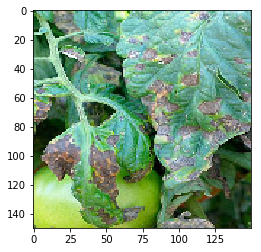

In [70]:
visual(daun_batch)